# Visualize E-GEOD-33245 patterns
This notebook will examine patterns of generic and experiment-specific genes using E-GEOD-33245 as the template experiment

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# Load data
# Summary data using abs value of test statistic
grp_1v2_file = "generic_gene_summary_E-GEOD-33245_1v2.tsv"
grp_1v3_file = "generic_gene_summary_E-GEOD-33245_1v3.tsv"
grp_1v4_file = "generic_gene_summary_E-GEOD-33245_1v4.tsv"

# Summary data using raw value of test statistic to get directionality
grp_1v2_raw_file = "generic_gene_summary_E-GEOD-33245_1v2_raw.tsv"
grp_1v3_raw_file = "generic_gene_summary_E-GEOD-33245_1v3_raw.tsv"
grp_1v4_raw_file = "generic_gene_summary_E-GEOD-33245_1v4_raw.tsv"

## Compare 1v2 and 1v3 grouping
Within experiment E-GEOD-33245 we can perform 2 comparisons:
* Group 1v2: WT vs crc mutant
* Group 1v3: WT vs cbr mutant

We can then compare the test statistic between these two groups above. We hope to see that,
* Genes 1v3  > 1v2 are genes that change more in 1v3 than 1v2 and we guess are specific to 1v3 (high z-score)
* Genes 1v3 < 1v2 are genes that change more in 1v2 than 1v3 and we guess are specific to 1v2 (high z-score)
* Genes on the 1v3 = 1v2 line are those genes that change equally in both and we guess are generic genes (low z-score)

In [3]:
# Read data
grp_1v2 = pd.read_csv(grp_1v2_file, sep="\t", header=0, index_col=0)
grp_1v3 = pd.read_csv(grp_1v3_file, sep="\t", header=0, index_col=0)

In [4]:
grp_1v2.head()

Gene ID  Adj P-value (Real)  Rank (Real)  Test statistic (Real)  \
PA5530  PA5530            0.000088       5549.0                 4.2550   
PA0523  PA0523            0.001303       5548.0                 3.5580   
PA0524  PA0524            0.001303       5547.0                 3.2585   
PA5332  PA5332            0.053071       5546.0                 2.9380   
PA3874  PA3874            0.006250       5545.0                 2.8230   

        Median adj p-value (simulated)  Rank (simulated)  \
PA5530                        0.658782            5151.0   
PA0523                        0.856209            5390.0   
PA0524                        0.698655            5430.0   
PA5332                        0.950597            2092.0   
PA3874                        0.826863            4875.5   

        Mean test statistic (simulated)  Std deviation (simulated)  \
PA5530                          0.49472                   0.443135   
PA0523                          0.45682                   0.290028   
PA0524                          0.57044                   0.331890   
PA5332                          0.11008                   0.079361   
PA3874                          0.33770                   0.229561   

        Number of experiments (simulated)    Z score Gene Name  
PA5530                                 25   8.485636       NaN  
PA0523                                 25  10.692710      norC  
PA0524                                 25   8.099239      norB  
PA5332                                 25  35.633647       crc  
PA3874                                 25  10.826302      narH

In [5]:
grp_1v3.head()

Gene ID  Adj P-value (Real)  Rank (Real)  Test statistic (Real)  \
PA4726  PA4726            0.000010       5549.0                 4.5310   
PA1985  PA1985            0.000927       5548.0                 2.9735   
PA4131  PA4131            0.000348       5547.0                 2.8815   
PA4739  PA4739            0.000223       5546.0                 2.7850   
PA1216  PA1216            0.000223       5545.0                 2.6005   

        Median adj p-value (simulated)  Rank (simulated)  \
PA4726                        0.962165            3657.0   
PA1985                        0.969671            5549.0   
PA4131                        0.964949            5520.0   
PA4739                        0.962165            5452.0   
PA1216                        0.962165            5458.0   

        Mean test statistic (simulated)  Std deviation (simulated)  \
PA4726                          0.12436                   0.076626   
PA1985                          0.42170                   0.278023   
PA4131                          0.32658                   0.217609   
PA4739                          0.33814                   0.430420   
PA1216                          0.30262                   0.202536   

        Number of experiments (simulated)    Z score Gene Name  
PA4726                                 25  57.508783      cbrB  
PA1985                                 25   9.178372      pqqA  
PA4131                                 25  11.740890       NaN  
PA4739                                 25   5.684825       NaN  
PA1216                                 25  11.345563       NaN

In [6]:
merged_df = grp_1v2.merge(grp_1v3, left_on='Gene ID', right_on="Gene ID", suffixes=["_grp_1v2", "_grp_1v3"])

In [7]:
merged_df.head()

Gene ID  Adj P-value (Real)_grp_1v2  Rank (Real)_grp_1v2  \
0  PA5530                    0.000088               5549.0   
1  PA0523                    0.001303               5548.0   
2  PA0524                    0.001303               5547.0   
3  PA5332                    0.053071               5546.0   
4  PA3874                    0.006250               5545.0   

   Test statistic (Real)_grp_1v2  Median adj p-value (simulated)_grp_1v2  \
0                         4.2550                                0.658782   
1                         3.5580                                0.856209   
2                         3.2585                                0.698655   
3                         2.9380                                0.950597   
4                         2.8230                                0.826863   

   Rank (simulated)_grp_1v2  Mean test statistic (simulated)_grp_1v2  \
0                    5151.0                                  0.49472   
1                    5390.0                                  0.45682   
2                    5430.0                                  0.57044   
3                    2092.0                                  0.11008   
4                    4875.5                                  0.33770   

   Std deviation (simulated)_grp_1v2  \
0                           0.443135   
1                           0.290028   
2                           0.331890   
3                           0.079361   
4                           0.229561   

   Number of experiments (simulated)_grp_1v2  Z score_grp_1v2  \
0                                         25         8.485636   
1                                         25        10.692710   
2                                         25         8.099239   
3                                         25        35.633647   
4                                         25        10.826302   

         ...         Adj P-value (Real)_grp_1v3  Rank (Real)_grp_1v3  \
0        ...                           0.395383               3996.5   
1        ...                           0.425676               4652.0   
2        ...                           0.485255               3918.0   
3        ...                           0.441874               3803.5   
4        ...                           0.000348               5542.0   

   Test statistic (Real)_grp_1v3  Median adj p-value (simulated)_grp_1v3  \
0                         0.3175                                0.969671   
1                         0.4245                                0.970813   
2                         0.3065                                0.969671   
3                         0.2925                                0.981874   
4                         2.5420                                0.962749   

   Rank (simulated)_grp_1v3  Mean test statistic (simulated)_grp_1v3  \
0                    4025.0                                  0.21108   
1                    5215.5                                  0.22378   
2                    5139.0                                  0.25394   
3                    2725.5                                  0.09666   
4                    3008.0                                  0.20082   

   Std deviation (simulated)_grp_1v3  \
0                           0.292025   
1                           0.195986   
2                           0.210468   
3                           0.079667   
4                           0.229705   

   Number of experiments (simulated)_grp_1v3  Z score_grp_1v3  \
0                                         25         0.364421   
1                                         25         1.024156   
2                                         25         0.249729   
3                                         25         2.458221   
4                                         25        10.192097   

   Gene Name_grp_1v3  
0                NaN  
1               norC  
2               norB  
3                crc  
4               narH  

[5 rows x 21 

In [8]:
# Add max(z-score of 1v2, z-score 1v3) to color by
merged_df['mean Z score'] = abs(merged_df[['Z score_grp_1v2','Z score_grp_1v3']].mean(axis=1))
merged_df['max Z score'] = abs(merged_df[['Z score_grp_1v2','Z score_grp_1v3']].max(axis=1))
merged_df.head()

Gene ID  Adj P-value (Real)_grp_1v2  Rank (Real)_grp_1v2  \
0  PA5530                    0.000088               5549.0   
1  PA0523                    0.001303               5548.0   
2  PA0524                    0.001303               5547.0   
3  PA5332                    0.053071               5546.0   
4  PA3874                    0.006250               5545.0   

   Test statistic (Real)_grp_1v2  Median adj p-value (simulated)_grp_1v2  \
0                         4.2550                                0.658782   
1                         3.5580                                0.856209   
2                         3.2585                                0.698655   
3                         2.9380                                0.950597   
4                         2.8230                                0.826863   

   Rank (simulated)_grp_1v2  Mean test statistic (simulated)_grp_1v2  \
0                    5151.0                                  0.49472   
1                    5390.0                                  0.45682   
2                    5430.0                                  0.57044   
3                    2092.0                                  0.11008   
4                    4875.5                                  0.33770   

   Std deviation (simulated)_grp_1v2  \
0                           0.443135   
1                           0.290028   
2                           0.331890   
3                           0.079361   
4                           0.229561   

   Number of experiments (simulated)_grp_1v2  Z score_grp_1v2     ...       \
0                                         25         8.485636     ...        
1                                         25        10.692710     ...        
2                                         25         8.099239     ...        
3                                         25        35.633647     ...        
4                                         25        10.826302     ...        

  Test statistic (Real)_grp_1v3  Median adj p-value (simulated)_grp_1v3  \
0                        0.3175                                0.969671   
1                        0.4245                                0.970813   
2                        0.3065                                0.969671   
3                        0.2925                                0.981874   
4                        2.5420                                0.962749   

   Rank (simulated)_grp_1v3  Mean test statistic (simulated)_grp_1v3  \
0                    4025.0                                  0.21108   
1                    5215.5                                  0.22378   
2                    5139.0                                  0.25394   
3                    2725.5                                  0.09666   
4                    3008.0                                  0.20082   

   Std deviation (simulated)_grp_1v3  \
0                           0.292025   
1                           0.195986   
2                           0.210468   
3                           0.079667   
4                           0.229705   

   Number of experiments (simulated)_grp_1v3  Z score_grp_1v3  \
0                                         25         0.364421   
1                                         25         1.024156   
2                                         25         0.249729   
3                                         25         2.458221   
4                                         25        10.192097   

   Gene Name_grp_1v3  mean Z score  max Z score  
0                NaN      4.425028     8.485636  
1               norC      5.858433    10.692710  
2               norB      4.174484     8.099239  
3                crc     19.045934    35.633647  
4               narH     10.509199    10.826302  

[5 rows x 23 columns]

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


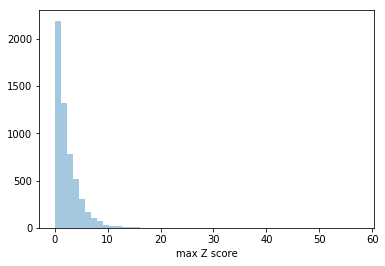

In [9]:
sns.distplot(merged_df['max Z score'], kde=False)

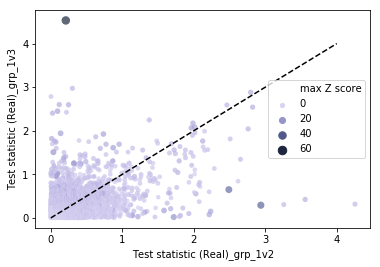

In [10]:
cmap = sns.cubehelix_palette(start=2.8, rot=.1, as_cmap=True)
sns.scatterplot(data=merged_df,
                #data=merged_df[merged_df["max Z score"]<0.5],
                x="Test statistic (Real)_grp_1v2",
                y="Test statistic (Real)_grp_1v3",
                hue="max Z score",
                size="max Z score",
                linewidth=0,
                alpha=0.7,
                palette=cmap)
plt.plot([0,4],[0,4],"--k")

In [11]:
merged_df[merged_df['max Z score']>20]

Gene ID  Adj P-value (Real)_grp_1v2  Rank (Real)_grp_1v2  \
3     PA5332                    0.053071               5546.0   
10    PA0755                    0.001303               5539.0   
53    PA0753                    0.008576               5496.0   
2543  PA4726                    0.876793               3005.0   

      Test statistic (Real)_grp_1v2  Median adj p-value (simulated)_grp_1v2  \
3                            2.9380                                0.950597   
10                           2.4905                                0.931534   
53                           1.7200                                0.918151   
2543                         0.2105                                0.870570   

      Rank (simulated)_grp_1v2  Mean test statistic (simulated)_grp_1v2  \
3                       2092.0                                  0.11008   
10                      2117.0                                  0.10894   
53                      1784.5                                  0.09190   
2543                    1928.5                                  0.11778   

      Std deviation (simulated)_grp_1v2  \
3                              0.079361   
10                             0.072490   
53                             0.079243   
2543                           0.096139   

      Number of experiments (simulated)_grp_1v2  Z score_grp_1v2     ...       \
3                                            25        35.633647     ...        
10                                           25        32.853510     ...        
53                                           25        20.545723     ...        
2543                                         25         0.964435     ...        

     Test statistic (Real)_grp_1v3  Median adj p-value (simulated)_grp_1v3  \
3                           0.2925                                0.981874   
10                          0.6505                                0.975162   
53                          0.0205                                0.973143   
2543                        4.5310                                0.962165   

      Rank (simulated)_grp_1v3  Mean test statistic (simulated)_grp_1v3  \
3                       2725.5                                  0.09666   
10                      2364.0                                  0.08684   
53                      1518.5                                  0.07536   
2543                    3657.0                                  0.12436   

      Std deviation (simulated)_grp_1v3  \
3                              0.079667   
10                             0.063120   
53                             0.072750   
2543                           0.076626   

      Number of experiments (simulated)_grp_1v3  Z score_grp_1v3  \
3                                            25         2.458221   
10                                           25         8.929922   
53                                           25        -0.754089   
2543                                         25        57.508783   

      Gene Name_grp_1v3  mean Z score  max Z score  
3                   crc     19.045934    35.633647  
10                 opdH     20.891716    32.853510  
53                  NaN      9.895817    20.545723  
2543               cbrB     29.236609    57.508783  

[4 rows x 23 columns]

In [12]:
merged_df.to_csv("merged_E-GEOD_1v2_1v3.tsv", sep="\t")

**Takeaway:**
* A few specific genes (with very high z-score) in the off x-y regions as expected. This shows some promise for using z-score to distinguish between generic and specific genes and we can start looking more into these trends.

## Create dataframe to compare trends
Here we create dataframes that Deb can look at to find *things of interest* as we start looking into how to use our computational predictions of generic and specific genes.

She would like a dataframe with 1v2 and 1v3, 1v3 and 1v4.

In [13]:
# Read data
grp_1v2 = pd.read_csv(grp_1v2_file, sep="\t", header=0, index_col=0)
grp_1v3 = pd.read_csv(grp_1v3_file, sep="\t", header=0, index_col=0)
grp_1v4 = pd.read_csv(grp_1v4_file, sep="\t", header=0, index_col=0)

grp_1v2_raw = pd.read_csv(grp_1v2_raw_file, sep="\t", header=0, index_col=0)
grp_1v3_raw = pd.read_csv(grp_1v3_raw_file, sep="\t", header=0, index_col=0)
grp_1v4_raw = pd.read_csv(grp_1v4_raw_file, sep="\t", header=0, index_col=0)

In [14]:
# Merge 1v2 and 1v3 summaries
merged_1v2s_df = grp_1v2.merge(grp_1v2_raw, left_on='Gene ID', right_on="Gene ID", suffixes=["_grp_1v2", "_grp_1v2_raw"])
merged_1v3s_df = grp_1v3.merge(grp_1v3_raw, left_on='Gene ID', right_on="Gene ID", suffixes=["_grp_1v3", "_grp_1v3_raw"])
merged_1v2_1v3_all_df = merged_1v2s_df.merge(merged_1v3s_df, left_on='Gene ID', right_on="Gene ID")
merged_1v2_1v3_all_df.head()

Gene ID  Adj P-value (Real)_grp_1v2  Rank (Real)_grp_1v2  \
0  PA5530                    0.000088               5549.0   
1  PA0523                    0.001303               5548.0   
2  PA0524                    0.001303               5547.0   
3  PA5332                    0.053071               5546.0   
4  PA3874                    0.006250               5545.0   

   Test statistic (Real)_grp_1v2  Median adj p-value (simulated)_grp_1v2  \
0                         4.2550                                0.658782   
1                         3.5580                                0.856209   
2                         3.2585                                0.698655   
3                         2.9380                                0.950597   
4                         2.8230                                0.826863   

   Rank (simulated)_grp_1v2  Mean test statistic (simulated)_grp_1v2  \
0                    5151.0                                  0.49472   
1                    5390.0                                  0.45682   
2                    5430.0                                  0.57044   
3                    2092.0                                  0.11008   
4                    4875.5                                  0.33770   

   Std deviation (simulated)_grp_1v2  \
0                           0.443135   
1                           0.290028   
2                           0.331890   
3                           0.079361   
4                           0.229561   

   Number of experiments (simulated)_grp_1v2  Z score_grp_1v2  \
0                                         25         8.485636   
1                                         25        10.692710   
2                                         25         8.099239   
3                                         25        35.633647   
4                                         25        10.826302   

           ...           Adj P-value (Real)_grp_1v3_raw  \
0          ...                                 0.395383   
1          ...                                 0.425676   
2          ...                                 0.485255   
3          ...                                 0.441874   
4          ...                                 0.000348   

   Rank (Real)_grp_1v3_raw  Test statistic (Real)_grp_1v3_raw  \
0                   4746.0                             0.3175   
1                    388.0                            -0.4245   
2                    793.0                            -0.3065   
3                   4662.5                             0.2925   
4                      4.0                            -2.5420   

   Median adj p-value (simulated)_grp_1v3_raw  Rank (simulated)_grp_1v3_raw  \
0                                    0.969671                        4381.0   
1                                    0.970813                        3555.5   
2                                    0.969671                        4501.5   
3                                    0.981874                        2847.0   
4                                    0.962749                        1251.5   

   Mean test statistic (simulated)_grp_1v3_raw  \
0                                      0.14752   
1                                      0.03086   
2                                      0.04610   
3                                      0.00682   
4                                     -0.13642   

   Std deviation (simulated)_grp_1v3_raw  \
0                               0.330183   
1                               0.299303   
2                               0.330538   
3                               0.126613   
4                               0.274568   

   Number of experiments (simulated)_grp_1v3_raw  Z score_grp_1v3_raw  \
0                                             25             0.514805   
1                                             25            -1.521400   
2                                             25            -1.066745   
3                           

In [15]:
# Get specific columns requested by Deb
merged_1v2_1v3_all_df['max Z score'] = merged_1v2_1v3_all_df[['Z score_grp_1v2','Z score_grp_1v3']].max(axis=1)

merged_1v2_1v3_df = merged_1v2_1v3_all_df[['Gene ID',
                                           'Gene Name_grp_1v2', 
                                           'Test statistic (Real)_grp_1v2',
                                           'Test statistic (Real)_grp_1v2_raw',
                                           'Test statistic (Real)_grp_1v3',
                                           'Test statistic (Real)_grp_1v3_raw',
                                           'Z score_grp_1v2',
                                           'Z score_grp_1v3',
                                           'max Z score'
                         ]]

merged_1v2_1v3_df.head()

Gene ID Gene Name_grp_1v2  Test statistic (Real)_grp_1v2  \
0  PA5530               NaN                         4.2550   
1  PA0523              norC                         3.5580   
2  PA0524              norB                         3.2585   
3  PA5332               crc                         2.9380   
4  PA3874              narH                         2.8230   

   Test statistic (Real)_grp_1v2_raw  Test statistic (Real)_grp_1v3  \
0                             4.2550                         0.3175   
1                            -3.5580                         0.4245   
2                            -3.2585                         0.3065   
3                            -2.9380                         0.2925   
4                            -2.8230                         2.5420   

   Test statistic (Real)_grp_1v3_raw  Z score_grp_1v2  Z score_grp_1v3  \
0                             0.3175         8.485636         0.364421   
1                            -0.4245        10.692710         1.024156   
2                            -0.3065         8.099239         0.249729   
3                             0.2925        35.633647         2.458221   
4                            -2.5420        10.826302        10.192097   

   max Z score  
0     8.485636  
1    10.692710  
2     8.099239  
3    35.633647  
4    10.826302

In [16]:
# Merge 1v3 and 1v4 summaries
merged_1v4s_df = grp_1v4.merge(grp_1v4_raw, left_on='Gene ID', right_on="Gene ID", suffixes=["_grp_1v4", "_grp_1v4_raw"])
merged_1v3_1v4_all_df = merged_1v3s_df.merge(merged_1v4s_df, left_on='Gene ID', right_on="Gene ID")
merged_1v3_1v4_all_df.head()

Gene ID  Adj P-value (Real)_grp_1v3  Rank (Real)_grp_1v3  \
0  PA4726                    0.000010               5549.0   
1  PA1985                    0.000927               5548.0   
2  PA4131                    0.000348               5547.0   
3  PA4739                    0.000223               5546.0   
4  PA1216                    0.000223               5545.0   

   Test statistic (Real)_grp_1v3  Median adj p-value (simulated)_grp_1v3  \
0                         4.5310                                0.962165   
1                         2.9735                                0.969671   
2                         2.8815                                0.964949   
3                         2.7850                                0.962165   
4                         2.6005                                0.962165   

   Rank (simulated)_grp_1v3  Mean test statistic (simulated)_grp_1v3  \
0                    3657.0                                  0.12436   
1                    5549.0                                  0.42170   
2                    5520.0                                  0.32658   
3                    5452.0                                  0.33814   
4                    5458.0                                  0.30262   

   Std deviation (simulated)_grp_1v3  \
0                           0.076626   
1                           0.278023   
2                           0.217609   
3                           0.430420   
4                           0.202536   

   Number of experiments (simulated)_grp_1v3  Z score_grp_1v3  \
0                                         25        57.508783   
1                                         25         9.178372   
2                                         25        11.740890   
3                                         25         5.684825   
4                                         25        11.345563   

           ...           Adj P-value (Real)_grp_1v4_raw  \
0          ...                                 0.747843   
1          ...                                 0.000230   
2          ...                                 0.003054   
3          ...                                 0.000488   
4          ...                                 0.000488   

   Rank (Real)_grp_1v4_raw  Test statistic (Real)_grp_1v4_raw  \
0                   1198.0                            -0.1960   
1                   5549.0                             2.8720   
2                     33.0                            -1.5115   
3                   5546.0                             2.1275   
4                   5541.0                             1.8350   

   Median adj p-value (simulated)_grp_1v4_raw  Rank (simulated)_grp_1v4_raw  \
0                                    0.951414                        2136.0   
1                                    0.893453                        5500.0   
2                                    0.916404                          16.0   
3                                    0.916404                        5138.5   
4                                    0.893453                        5507.0   

   Mean test statistic (simulated)_grp_1v4_raw  \
0                                     -0.05250   
1                                      0.34116   
2                                     -0.24476   
3                                      0.13126   
4                                      0.36828   

   Std deviation (simulated)_grp_1v4_raw  \
0                               0.160304   
1                               0.280221   
2                               0.287264   
3                               0.330185   
4                               0.184209   

   Number of experiments (simulated)_grp_1v4_raw  Z score_grp_1v4_raw  \
0                                             25            -0.895173   
1                                             25             9.031570   
2                                             25            -4.409670   
3                           

In [17]:
# Get specific columns requested by Deb
merged_1v3_1v4_all_df['max Z score'] = merged_1v3_1v4_all_df[['Z score_grp_1v3','Z score_grp_1v4']].max(axis=1)
merged_1v3_1v4_df = merged_1v3_1v4_all_df[['Gene ID',
                                           'Gene Name_grp_1v3', 
                                           'Test statistic (Real)_grp_1v3',
                                           'Test statistic (Real)_grp_1v3_raw',
                                           'Test statistic (Real)_grp_1v4',
                                           'Test statistic (Real)_grp_1v4_raw',
                                           'Z score_grp_1v3',
                                           'Z score_grp_1v4',
                                           'max Z score'
                         ]]

merged_1v3_1v4_df.head()

Gene ID Gene Name_grp_1v3  Test statistic (Real)_grp_1v3  \
0  PA4726              cbrB                         4.5310   
1  PA1985              pqqA                         2.9735   
2  PA4131               NaN                         2.8815   
3  PA4739               NaN                         2.7850   
4  PA1216               NaN                         2.6005   

   Test statistic (Real)_grp_1v3_raw  Test statistic (Real)_grp_1v4  \
0                            -4.5310                         0.1960   
1                             2.9735                         2.8720   
2                            -2.8815                         1.5115   
3                             2.7850                         2.1275   
4                             2.6005                         1.8350   

   Test statistic (Real)_grp_1v4_raw  Z score_grp_1v3  Z score_grp_1v4  \
0                            -0.1960        57.508783         0.677577   
1                             2.8720         9.178372         9.105944   
2                            -1.5115        11.740890         6.093573   
3                             2.1275         5.684825         8.264750   
4                             1.8350        11.345563         8.017062   

   max Z score  
0    57.508783  
1     9.178372  
2    11.740890  
3     8.264750  
4    11.345563

In [18]:
# Save
merged_1v2_1v3_df.to_csv("merged_E-GEOD_1v2_1v3_directionality.tsv", sep="\t")
merged_1v3_1v4_df.to_csv("merged_E-GEOD_1v3_1v4_directionality.tsv", sep="\t")